# Hypothesis testing results

Generates p-value matrices with permutations of 1,3,5,7 shots for verification and classification accuracy for each model at the test set.

# Import libraries

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import pickle
import scipy.stats
import matplotlib.pyplot as plt 
import scipy.stats as st
import statistics

# Set directories

In [2]:
dir_zero = "SiameseZero/TrainSupport/"
dir_conv = "SiameseConvolutional/TrainSupport/"
dir_FCN = "SiameseFCN/TrainSupport/"
dir_biLSTM = "SiameseBiLSTM/TrainSupport/"
dir_LSTM = "SiameseLSTM/TrainSupport/"

# Utility functions

In [3]:
#Get verification / classification test accuracies
def get_acc(directory,field):
    values = []
    for shots in [1,3,5,7]:
        with open(directory + 'k' + str(shots) + '.pickle', 'rb') as f:
            x = pickle.load(f)
        if field == "verification":
            v = [a[1] for a in x] #Verification accuracy test
        if field == "classification":
            v = [a[3] for a in x] #Classification accuracy test
        values.append(v)
    return values

In [4]:
#Creates p-value matrix with permutations of k-shots
def get_pval_matrix(values):
    p_vals = []
    for a in values:
        row = []
        for b in values:
            p = scipy.stats.ttest_ind(a,b,equal_var=True)[1]
            row.append(p)
        p_vals.append(row)
    p_vals = np.array(p_vals)
    return p_vals

In [11]:
#Plots and saves p-value matrix
def plot_mat(values,name,task_type):
    p_vals = get_pval_matrix(values)
    print(p_vals)
    fig, ax = plt.subplots() 
    ax = sns.heatmap(np.log(p_vals),xticklabels=[1,3,5,7],yticklabels=[1,3,5,7],linewidths=.5)
    ax.set_title("Log p-values for "+task_type+" test accuracy ("+name+")")
    ax.set_xlabel("shots")
    ax.set_ylabel("shots")
    fig.savefig(task_type+"_"+name+"_pvals")

# Plot verification accuracies p-values for shots 1,3,5,7

In [7]:
#verification values
v_LSTM = get_acc(dir_LSTM,"verification")
v_biLSTM = get_acc(dir_biLSTM,"verification")
v_FCN = get_acc(dir_FCN,"verification")
v_conv = get_acc(dir_conv,"verification")
v_zero = get_acc(dir_zero,"verification")

[[1.00000000e+00 1.64311804e-30 2.01240271e-39 1.35238683e-29]
 [1.64311804e-30 1.00000000e+00 5.93468236e-08 1.05161019e-05]
 [2.01240271e-39 5.93468236e-08 1.00000000e+00 4.48763764e-01]
 [1.35238683e-29 1.05161019e-05 4.48763764e-01 1.00000000e+00]]
[[1.00000000e+00 7.57801183e-30 4.45492117e-33 6.38387553e-34]
 [7.57801183e-30 1.00000000e+00 4.64841629e-09 2.50768304e-12]
 [4.45492117e-33 4.64841629e-09 1.00000000e+00 7.41284718e-02]
 [6.38387553e-34 2.50768304e-12 7.41284718e-02 1.00000000e+00]]
[[1.00000000e+00 9.05539638e-10 5.21307235e-13 5.67367811e-14]
 [9.05539638e-10 1.00000000e+00 8.09679604e-03 3.15718527e-04]
 [5.21307235e-13 8.09679604e-03 1.00000000e+00 2.42808916e-01]
 [5.67367811e-14 3.15718527e-04 2.42808916e-01 1.00000000e+00]]
[[1.00000000e+00 2.04509428e-31 5.34983887e-17 6.30253241e-32]
 [2.04509428e-31 1.00000000e+00 4.31032177e-02 1.15768707e-10]
 [5.34983887e-17 4.31032177e-02 1.00000000e+00 2.99154705e-03]
 [6.30253241e-32 1.15768707e-10 2.99154705e-03 1.000

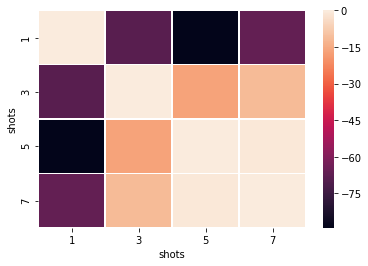

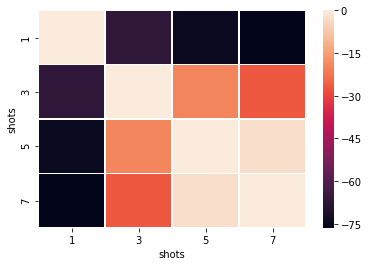

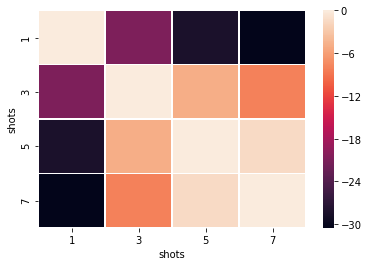

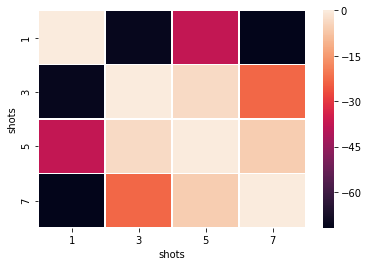

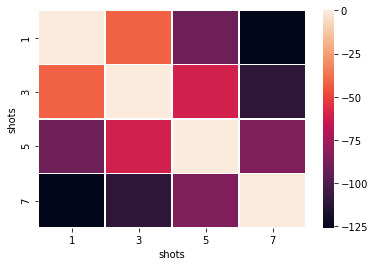

In [8]:
plot_mat(v_LSTM,"LSTM","verification")
plot_mat(v_biLSTM,"BiLSTM","verification")
plot_mat(v_FCN,"FCN","verification")
plot_mat(v_conv,"Conv","verification")
plot_mat(v_zero,"Zero","verification")

# Plot classification accuracies p-values for shots 1,3,5,7

In [9]:
#classification values
c_LSTM = get_acc(dir_LSTM,"classification")
c_biLSTM = get_acc(dir_biLSTM,"classification")
c_FCN = get_acc(dir_FCN,"classification")
c_conv = get_acc(dir_conv,"classification")
c_zero = get_acc(dir_zero,"classification")

[[1.00000000e+00 9.42178365e-18 4.24033001e-25 1.73679601e-23]
 [9.42178365e-18 1.00000000e+00 4.18556743e-03 9.34362523e-03]
 [4.24033001e-25 4.18556743e-03 1.00000000e+00 8.47429780e-01]
 [1.73679601e-23 9.34362523e-03 8.47429780e-01 1.00000000e+00]]
[[1.00000000e+00 1.37543937e-30 7.54419502e-34 3.49689030e-35]
 [1.37543937e-30 1.00000000e+00 8.77645944e-10 4.95435006e-15]
 [7.54419502e-34 8.77645944e-10 1.00000000e+00 6.10202041e-02]
 [3.49689030e-35 4.95435006e-15 6.10202041e-02 1.00000000e+00]]
[[1.00000000e+00 8.55053886e-03 1.04631365e-05 6.82146121e-04]
 [8.55053886e-03 1.00000000e+00 4.35942428e-02 2.47746155e-01]
 [1.04631365e-05 4.35942428e-02 1.00000000e+00 4.61705760e-01]
 [6.82146121e-04 2.47746155e-01 4.61705760e-01 1.00000000e+00]]
[[1.00000000e+00 2.05325398e-16 2.01785454e-19 7.79363351e-21]
 [2.05325398e-16 1.00000000e+00 9.40830243e-02 9.99248477e-03]
 [2.01785454e-19 9.40830243e-02 1.00000000e+00 3.24684231e-01]
 [7.79363351e-21 9.99248477e-03 3.24684231e-01 1.000

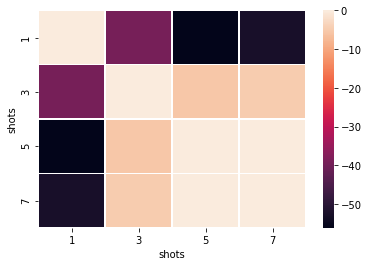

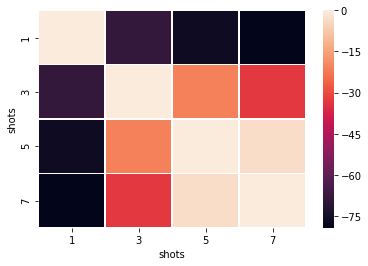

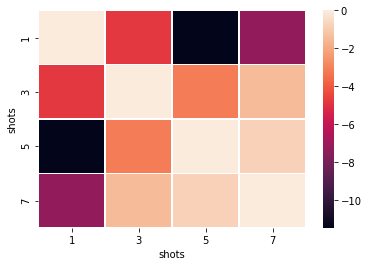

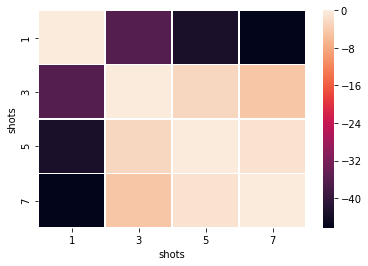

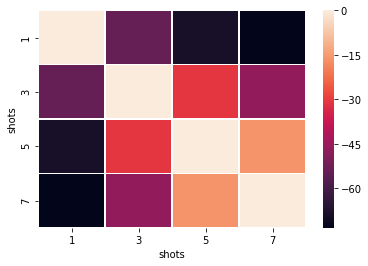

In [10]:
plot_mat(c_LSTM,"LSTM","classification")
plot_mat(c_biLSTM,"BiLSTM","classification")
plot_mat(c_FCN,"FCN","classification")
plot_mat(c_conv,"Conv","classification")
plot_mat(c_zero,"Zero","classification")